<a href="https://colab.research.google.com/github/jjyoon1106/code-0/blob/main/kmeans_2020116957.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

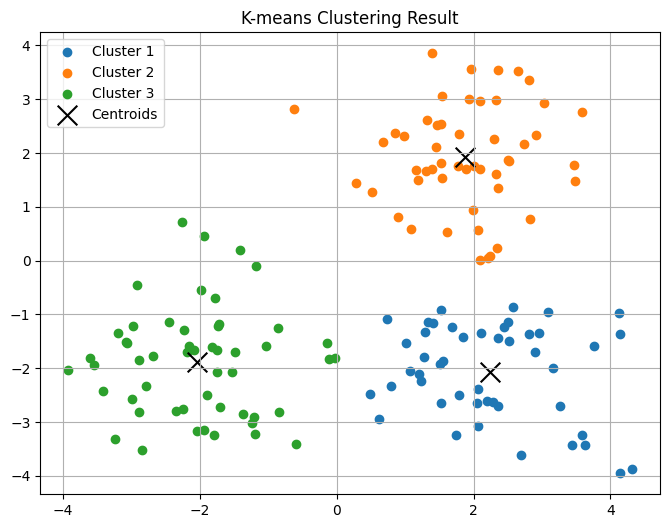

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
data = np.vstack((
    np.random.randn(50, 2) + np.array([2, 2]),
    np.random.randn(50, 2) + np.array([-2, -2]),
    np.random.randn(50, 2) + np.array([2, -2])
))

# 1. 센트로이드 초기화
def initialize_centroids(data, k): # 아래의 코드 중 None 은 그대로 쓰는 것이 아니라 힌트로 남겨둔 것임
    """
    데이터에서 센트로이드 k개를 무작위로 선택
    """
    # TODO 1: 센트로이드 k개를 랜덤하게 뽑아서 반환
    indices = np.random.choice(len(data), k, replace=False)
    # Hint: np.random.choice()
    return data[indices]

# 2. 군집 할당
def assign_clusters(data, centroids):
    """
    각 데이터 포인트를 가장 가까운 센트로이드에 할당
    """
    # TODO 2: 유클리디안 거리로 가장 가까운 센트로이드 선택

    # Hint: np.linalg.norm 및 np.argmin()
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)

    return np.argmin(distances, axis=1)

# 3. 센트로이드 재계산
def update_centroids(data, labels, k):
    """
    각 군집의 평균 위치로 센트로이드 재계산
    """
    # TODO 3: label에 따라 각 군집 평균 계산
    # Hint: data[labels == i].mean(axis=0)
    centroids = np.zeros((k, data.shape[1])) #으로 시작하여 아래 TODO 3 진행
    for i in range(k):
       centroids[i] = data[labels == i].mean(axis=0)
    return centroids

# 4. 전체 K-means 수행
def kmeans(data, k, max_iters=100, tol=1e-4): # tol: 변화량 기준값
    """
    전체 K-means 알고리즘 반복 수행
    """
    # TODO 4-1: 초기 센트로이드 선택
    # Hint: initialize_centroids(data, k) 호출
    centroids = initialize_centroids(data, k)

    for i in range(max_iters):
        # TODO 4-2: 각 데이터 포인트에 대해 가장 가까운 센트로이드에 할당
        # Hint: assign_clusters(data, centroids)
        labels = assign_clusters(data, centroids)

        # TODO 4-3: 군집별 평균 위치로 센트로이드 재계산
        # Hint: update_centroids(data, labels, k)
        new_centroids = update_centroids(data, labels, k)

        # TODO 4-4: 센트로이드의 변화량이 충분히 작으면 반복 종료
        # Hint: np.allclose(centroids, new_centroids, atol=tol) 아래의 False 부분도 수정 수정해야함
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    return labels, centroids

# 5. 시각화
def plot_clusters(data, labels, centroids):
    """
    군집별로 색을 다르게 하여 시각화
    """
    plt.figure(figsize=(8, 6))
    for i in range(np.max(labels) + 1):
        cluster = data[labels == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster {i+1}")
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')
    plt.title("K-means Clustering Result")
    plt.legend()
    plt.grid(True)
    plt.show()

# 실행
k = 3
labels, centroids = kmeans(data, k)
plot_clusters(data, labels, centroids)
